In [1]:
from src.lib.adapter.graph.from_edges import EdgesGraphBuilder
from src.lib.adapter.layout.random_layout import RandomLayout
from src.lib.adapter.visualizer.convex_hull import MatplotlibVisualizer
from src.lib.adapter.heuristics.neighbor_weight_delta import heuristic_delta_by_neighbor_weight

from src.lib.domain.models.partition import Partition
from src.lib.domain.algorithms.distance.leiden import leiden


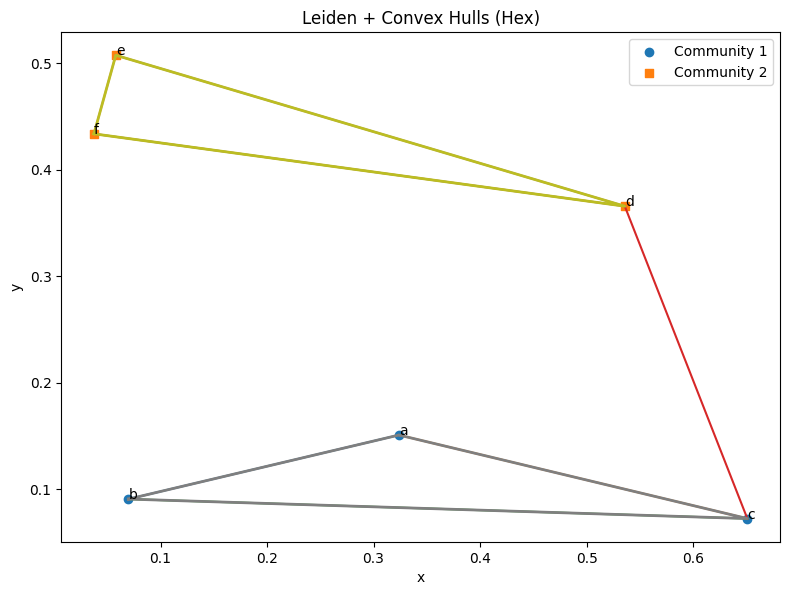

In [2]:
edges = [
    ("a","b",1), ("b","c",1), ("c","a",1),
    ("d","e",1), ("e","f",1), ("f","d",1),
    ("c","d",0.1),
]

builder = EdgesGraphBuilder()
layout = RandomLayout(seed=7)
viz = MatplotlibVisualizer()

G = builder.build(edges)
P0 = Partition({v: v for v in G.nodes()})
final_partition = leiden(G, P0, heuristic_delta_by_neighbor_weight, gamma=1.0, theta=0.5)

positions = layout.get_positions(G)
viz.render(G, [set(c) for c in final_partition], positions,
           title="Leiden + Convex Hulls (Hex)")


In [3]:
print("Final partition:", final_partition)

Final partition: [{'c', 'a', 'b'}, {'e', 'f', 'd'}]
